#  Strategies to Build Superior Models

In [2]:
import numpy as np 
import pandas as pd 
x = pd.read_csv("economic_x.csv")
x = x.drop(x.columns[[0]], axis=1)
y = pd.read_csv("economic_y.csv" ,header=None)
y = y.drop(y.columns[[0]], axis=1)

现在，缩放属性和目标位于0到1的范围内。

In [4]:
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))
x = np.array(x).reshape(( len(x), 4 ))
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
y = np.array(y).reshape(( len(y), 1 ))
y = scaler_y.fit_transform( y )

In [ ]:
## Create Train and Test Set

In [5]:
x_train = x[0:136,]
x_test = x[137:161,]
y_train = y[0:136]
y_test = y[137:161]

In [7]:
from keras.models import Sequential
from keras.layers import Dense
seed = 2020
np.random.seed( seed )
fit1 = Sequential()
fit1.add( Dense(40, input_dim=4, kernel_initializer='uniform', activation='relu' ))
fit1.add( Dense(20, kernel_initializer='uniform', activation='relu'))
fit1.add( Dense(1, kernel_initializer='normal'))

In [8]:
epochs = 3000
fit1.compile( loss = 'mean_squared_error', optimizer = 'adam')
fit1.fit( x_train , y_train , epochs = epochs, batch_size = 10)

.0044
Epoch 2763/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 2764/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 2765/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 2766/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 2767/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 2768/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2769/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 2770/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 2771/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 2772/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 2773/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 2774/3000
14/14 [==============================] - 0s 1ms/step -

In [12]:
forecast12 = fit1.predict(x_test)
forecast12 = scaler_y.inverse_transform(np.array(forecast12).reshape((len(forecast12), 1)))

In [17]:
ob = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

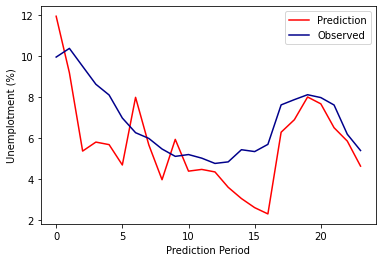

In [19]:
import matplotlib.pyplot as plt 
plt.plot(forecast12,label="Prediction", color="red")
plt.plot(ob,label="Observed", color="darkblue")
plt.ylabel("Unemplotment (%)")
plt.xlabel("Prediction Period")
plt.legend()
plt.show()

DNNs的强大之处很大程度上来自于每个神经元都作为独立的特征检测器工作。然而，在实际应用中，两个或多个神经元开始重复检测同一特征是很常见的。这就是所谓的共适应。它意味着DNN没有有效地利用其全部能力，实际上是在浪费计算资源，计算那些都在做同样事情的冗余神经元的激活。

在许多方面，共同适应性类似于线性回归中的一致性概念，即两个或多个协变量高度相关。它意味着协变量包含类似的信息；特别是，一个协变量可以从其他协变量中线性预测，而误差非常小。从本质上讲，一个或多个协变量在统计上是多余的。可以通过从模型中删除一个或多个协变量来解决共线性问题。

Dropout通过在训练的前馈阶段丢弃神经元激活的固定部分来阻止隐藏神经元的共同适应。Dropout也可以应用于输入。在这种情况下，算法会随机忽略固定比例的输入属性。

- Dropout可以通过在整个DNN中创建多条正确分类的路径来降低噪声样本中共适应的可能性。
- Dropout比例越大，在训练过程中引入的噪声就越多；这将减慢学习速度。
- Dropout似乎在非常大的DNN模型上提供了最大的好处。

# Adding Drop Out with Keras

In [20]:
from keras.layers import Dropout
dropout1 = 0.05
dropout2 = 0.05
fit2 = Sequential()

fit2.add(Dense(40, input_dim=4, kernel_initializer='uniform', activation='relu'))
fit2.add(Dropout(dropout1))

fit2.add(Dense(20, kernel_initializer='uniform', activation='relu'))
fit2.add(Dropout(dropout2))

fit2.add(Dense(1, kernel_initializer='normal'))

fit2.compile(loss='mean_squared_error', optimizer='adam')
fit2.fit(x_train, y_train, epochs=epochs, batch_size=10)

 0.0173
Epoch 2763/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 2764/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 2765/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 2766/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 2767/3000
14/14 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 2768/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 2769/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 2770/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 2771/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 2772/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 2773/3000
14/14 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 2774/3000
14/14 [==============================] - 0s 2ms/step

In [21]:
pred2 = fit2.predict(x_test)
pred2 = scaler_y.inverse_transform(np.array(pred2).reshape((len(pred2), 1)))

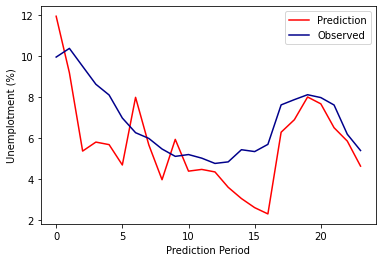

In [22]:
plt.plot(forecast12,label="Prediction", color="red")
plt.plot(ob,label="Observed", color="darkblue")
plt.ylabel("Unemplotment (%)")
plt.xlabel("Prediction Period")
plt.legend()
plt.show()

## Using Early Stopping in Keras

In [23]:
from keras.callbacks import EarlyStopping
fit3 = Sequential()
fit3.add(Dense(40, input_dim=4, kernel_initializer='uniform', activation='relu'))
fit3.add(Dense(20, kernel_initializer='uniform', activation='relu'))
fit3.add(Dense(1, kernel_initializer='normal'))
fit3.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
y_valid = y_train[112:136]
x_valid = x_train[112:136]

fit3.fit(x_train, y_train,
         epochs=epochs,
         batch_size=10,
         validation_data=(x_valid, y_valid),
         callbacks=[EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')]
        )

============================] - 0s 4ms/step - loss: 0.0263 - val_loss: 0.0234
Epoch 449/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0264 - val_loss: 0.0235
Epoch 450/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0235
Epoch 451/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0237
Epoch 452/3000
14/14 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.0235
Epoch 453/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.0236
Epoch 454/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.0240
Epoch 455/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.0235
Epoch 456/3000
14/14 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0240
Epoch 457/3000
14/14 [==============================] - 0s 7ms/step - loss: 0.0268 - val_loss: 0.0243
Epoc

In [25]:
pred3 = fit3.predict(x_test)
pred3 = scaler_y.inverse_transform(np.array(pred3).reshape((len(pred3), 1)))

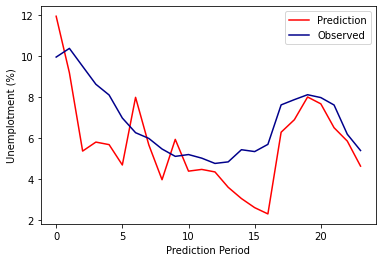

In [26]:
plt.plot(forecast12,label="Prediction", color="red")
plt.plot(ob,label="Observed", color="darkblue")
plt.ylabel("Unemplotment (%)")
plt.xlabel("Prediction Period")
plt.legend()
plt.show()